In [1]:
from protrend.model import *

entities = {
    Effector: ['protrend_id', 'name', 'kegg_compounds'],
    Gene: ['protrend_id', 'locus_tag', 'uniprot_accession', 'name', 'synonyms', 'function', 'description', 'ncbi_gene', 'ncbi_protein', 'genbank_accession', 'refseq_accession', 'protein_sequence', 'strand', 'start', 'stop', 'gene_sequence'],
    Organism: ['protrend_id', 'name', 'ncbi_taxonomy', 'species', 'strain', 'refseq_accession', 'genbank_accession', 'ncbi_assembly', 'assembly_accession'],
    Pathway: ['protrend_id', 'name', 'kegg_pathways'],
    Publication: ['protrend_id', 'pmid', 'doi', 'title', 'author', 'year'],
    Regulator: ['protrend_id', 'locus_tag', 'uniprot_accession', 'name', 'mechanism', 'synonyms', 'function', 'description', 'ncbi_gene', 'ncbi_protein', 'genbank_accession', 'refseq_accession', 'protein_sequence', 'strand', 'start', 'stop', 'gene_sequence'],
}

In [2]:
from protrend.utils import NeoDatabase, Settings

neo_db = NeoDatabase(user_name=Settings.db_user_name, password=Settings.db_password,
                     ip=Settings.db_ip, port=Settings.db_port)
neo_db.connect()

In [5]:
dfs = {}
for entity, attributes in entities.items():
    df = entity.node_to_df()
    n = int(df.shape[0])
    df = df[attributes]
    df = df.count(axis=0)
    df = df.reset_index(drop=False)
    df.columns = ['property', 'count']
    df['relative_frequency'] = round(df['count'].div(n) * 100, 2)
    dfs[entity.node_name()] = df

dfs

{'effector':          property  count  relative_frequency
 0     protrend_id    432              100.00
 1            name    432              100.00
 2  kegg_compounds    376               87.04,
 'gene':              property   count  relative_frequency
 0         protrend_id  112478              100.00
 1           locus_tag  112478              100.00
 2   uniprot_accession  101204               89.98
 3                name  112478              100.00
 4            synonyms  112478              100.00
 5            function   60886               54.13
 6         description   31732               28.21
 7           ncbi_gene  102489               91.12
 8        ncbi_protein  109328               97.20
 9   genbank_accession  105652               93.93
 10   refseq_accession   86733               77.11
 11   protein_sequence  109887               97.70
 12             strand  112478              100.00
 13              start  109459               97.32
 14               stop  109459

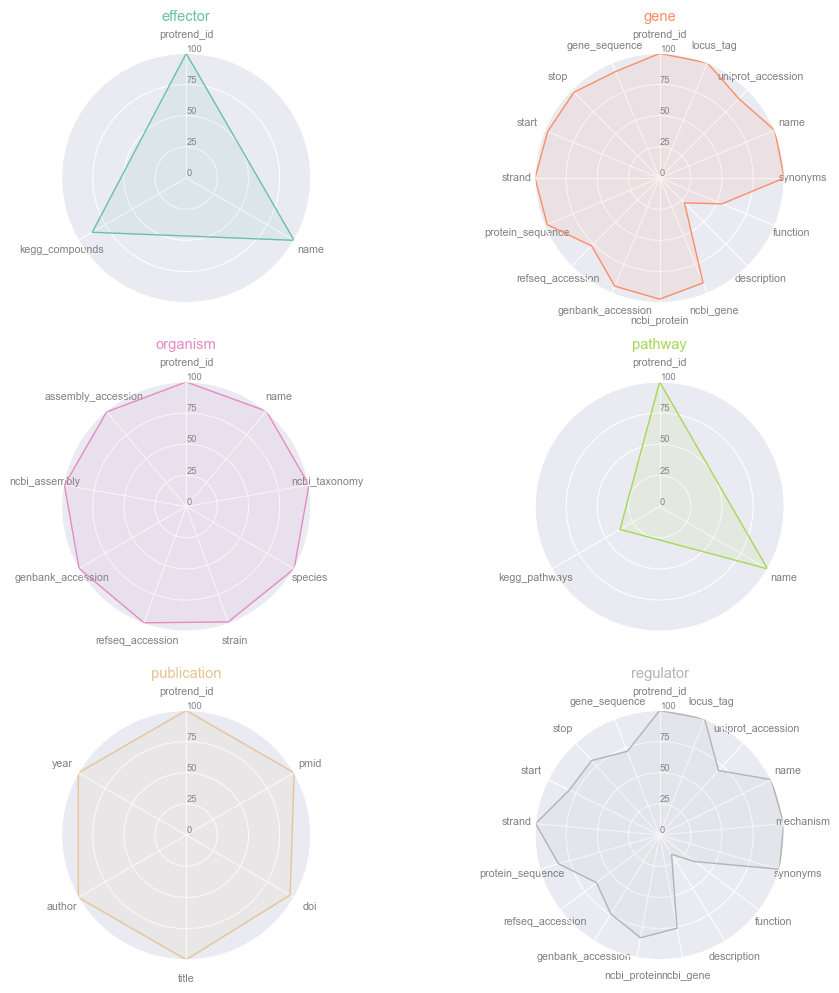

In [7]:
# Libraries
import matplotlib.pyplot as plt
from math import pi

def make_spider(data, row, title, color):
    # number of variable
    categories=list(data['property'])
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = data['relative_frequency'].tolist()
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3, 2, row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,25,50, 75, 100], ["0", "25", "50", "75", "100"], color='grey', size=7)
    plt.ylim(0,100)

    # Plot data
    ax.plot(angles, values, linewidth=1, color=color, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', color=color, alpha=0.1)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)


my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
pal = plt.cm.get_cmap("Set2", len(dfs))

# Loop to plot
for i, (label, data) in enumerate(dfs.items()):
    make_spider(data=data, row=i, title=label, color=pal(i))

plt.tight_layout()

# save the figure
plt.savefig("knowledge_expansion_report.png", bbox_inches="tight", dpi=150)

# Show the graph
plt.show()